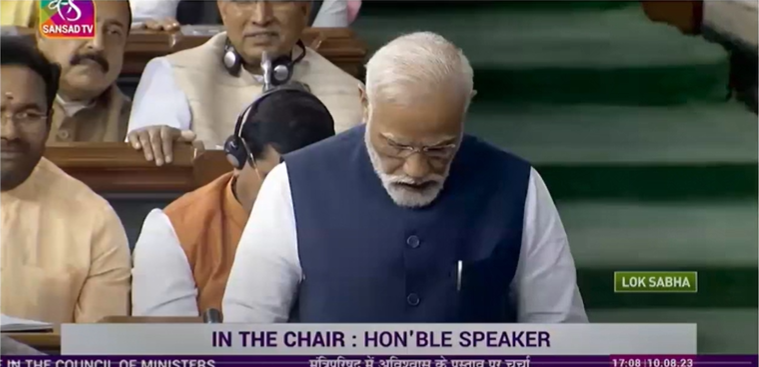

### The project aim to study the speech of PM Narendra Modi i.e, was the overall speech or it's impact was positive /negative /neutral. This is the speech from loksabha dated 10-08-2023.
##### The speech was given in hindi so translated to English and then text file.

##### For this project i will use Lemmatizer, SentimentIntensityAnalyser. Along with that I will show the word cloud to see the impact of word directly.

### Importing all the required libraries

In [3]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


import re
import nltk
from nltk.corpus import stopwords #corpus: consolidated reviews
from nltk.tokenize import sent_tokenize, word_tokenize # split sentence by sentence and word by word
from nltk.stem import WordNetLemmatizer #it will give meaningful root words with dict
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
#Sentiment analysis is a technique used to determine the emotional tone or sentiment expressed in a text. It involves analyzing the words and phrases used in the text to identify the underlying sentiment, whether it is positive, negative, or neutral.
from wordcloud import WordCloud
nltk.download ('punkt') #it needed for tokenization, abbreviation can be understand, for eg: adj, sth 
# nltk.download ('stopwords') #and, if, or
nltk.download ('vader_lexicon') # collection of positive, negative, neutral words
# I did'nt use stemming as it reduces last few words, though which may nt be meaningful(stemming: from nltk.stem import PorterStemmer go---go, going---goin, gone---gon) ; lemmatizer also reduces last letters but meaningfully:going---go, gone--go

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rinke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rinke\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# Importing file
file_path='speech.txt'
with open(file_path,encoding= 'utf-8') as file:
    speech_text=file.read()

In [5]:
speech_text

'“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”\n\n“Many key legislations did not get the discussion they deserved as the opposition put politics above them”\n\n“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”\n\n“We have given the youth of India a government free of scams”\n\n“Today a trust has arisen in the heart of the poor to fulfill his dreams”\n\n“Opposition is not able to see the trust of people as they are so steeped in distrust”\n\n“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”\n\n“Opposition believes in changing names but they can’t change their work culture”\n\n“Freedom fighters and founding fathers of the country always opposed dynasty politics”\n\n“Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the g

In [6]:
speech_text_clean=re.sub(r'[^\w\s]','',speech_text)
speech_text_clean=speech_text_clean.lower()
words=word_tokenize(speech_text_clean)
stop_words=set(stopwords.words('english'))
word_filter= [word for word in words if word not in stop_words]
word_filter
# here we are just chekcing unique words and their intensity in terms of +ve, -ve, can use ngram in place of stopwords 


['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scams',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dreams',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighters',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crimes',
 'women',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 '

In [7]:
# apply lemmatization
import nltk
nltk.download('omw-1.4')
#  By downloading the OMW dataset using nltk, we'll gain access to multilingual word relationships and meanings
lemma=WordNetLemmatizer()
words_lemma=[lemma.lemmatize(word) for word in word_filter]
words_lemma

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rinke\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislation',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'year',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scam',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dream',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'belief',
 'changing',
 'name',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighter',
 'founding',
 'father',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crime',
 'woman',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 'peace',
 '

In [8]:
# Let's check overall sentiment of the speech
sia= SentimentIntensityAnalyzer()
sentiment_scores=[sia.polarity_scores(word)['compound'] for word in words_lemma]
sentiment_scores
avg_score=sum(sentiment_scores) /len(sentiment_scores)
avg_score

0.014298377028714108

#### A positive sentiment score falls in the range of 0.1 to 1.0.
#### A negative sentiment scores are often in the range of -0.1 to -1.0.
#### And Scores around 0.0 are often considered neutral

#### A sentiment score of 0.014 is more accurately described as a very weak positive sentiment, but it's still on the positive side of the scale. It's not a strong positive sentiment, and it is closer to neutral than to a strong positive sentiment

In [9]:
print('The average sentiment is Neutral:',avg_score)

The average sentiment is Neutral: 0.014298377028714108


In [10]:
# Check the words
posi_words= [word for i,word in enumerate(word_filter) if sentiment_scores[i] >0.1]
negative_words= [word for i,word in enumerate(word_filter) if sentiment_scores[i] < -0.1]
neutral= [word for i,word in enumerate(word_filter) if sentiment_scores[i] >- 0.1 and sentiment_scores[i] <=0.1 ]

In [11]:
posi_words

['gratitude',
 'trust',
 'free',
 'trust',
 'fulfill',
 'dreams',
 'trust',
 'confidence',
 'top',
 'freedom',
 'fighters',
 'ensure',
 'peace',
 'assure',
 'faith',
 'commitment',
 'party',
 'revered',
 'confidence',
 'gratitude',
 'trust',
 'confidence',
 'strength',
 'lucky',
 'confidence',
 'blessings',
 'better',
 'important',
 'interest',
 'party',
 'free',
 'energy',
 'determination',
 'huge',
 'dreams',
 'strengths',
 'dreams',
 'free',
 'courage',
 'opportunity',
 'confidence',
 'confidence',
 'growth',
 'trust',
 'fulfill',
 'dreams',
 'marvel',
 'helping',
 'save',
 'helping',
 'save',
 'helping',
 'save',
 'trust',
 'like',
 'wish',
 'well',
 'best',
 'profit',
 'increased',
 'success',
 'growing',
 'stronger',
 'responsible',
 'vision',
 'top',
 'definite',
 'confidence',
 'top',
 'faith',
 'like',
 'agree',
 'peace',
 'trusting',
 'trust',
 'certain',
 'opportunity',
 'trust',
 'trust',
 'confidence',
 'help',
 'parties',
 'faith',
 'dwelled',
 'fascination',
 'freedom',


In [12]:
negative_words

['scams',
 'poor',
 'distrust',
 'crimes',
 'unacceptable',
 'guilty',
 'punished',
 'pressure',
 'stop',
 'poor',
 'deprived',
 'betrayal',
 'disappointed',
 'scams',
 'stressed',
 'unsuccessful',
 'poor',
 'poverty',
 'poverty',
 'poor',
 'poor',
 'criticizing',
 'distrust',
 'bad',
 'bad',
 'criticism',
 'bad',
 'misinformation',
 'confuse',
 'scam',
 'crisis',
 'severely',
 'attacked',
 'ills',
 'questioned',
 'lack',
 'poverty',
 'hard',
 'distrusting',
 'lack',
 'strike',
 'enemy',
 'ill',
 'misinformed',
 'insecurity',
 'misinformed',
 'low',
 'fool',
 'arrogance',
 'arrogant',
 'contradictions',
 'damages',
 'suffered',
 'victims',
 'perturbed',
 'stuck',
 'warned',
 'havoc',
 'lamented',
 'reckless',
 'pressure',
 'violence',
 'saddening',
 'crimes',
 'unacceptable',
 'guilty',
 'punished',
 'protest',
 'failure',
 'attack',
 'neglect',
 'conflict',
 'forbidden',
 'forbidden',
 'loss',
 'lack',
 'pressure',
 'stop',
 'worse',
 'petty',
 'pain',
 'suffering']

In [13]:
neutral

['come',
 'express',
 'immense',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'today',
 'arisen',
 'heart',
 'opposition',
 'able',
 'see',
 'people',
 'steeped',
 '2028',
 'bring',
 'motion',
 'country',
 'among',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'cant',
 'change',
 'work',
 'culture',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'women',
 'central',
 'government',
 'state',
 'government',
 'work',
 'manipur',
 'march',
 'path',
 'development',
 'people',
 'manipur',
 'mothers',
 'daughters',
 'manipur',
 'nation',
 'stands',
 'house',
 'stands',
 'government',
 'leave',
 'stone',
 'unturned',
 'manipur',
 'gets',
 

In [14]:
# Let's check the frequency of each word
word_freq_posi=nltk.FreqDist(posi_words)
word_freq_nega=nltk.FreqDist(negative_words)
word_freq_neut=nltk.FreqDist(neutral)

In [15]:
word_freq_posi,word_freq_nega,word_freq_neut

(FreqDist({'trust': 13, 'confidence': 12, 'dreams': 4, 'faith': 4, 'party': 4, 'like': 4, 'free': 3, 'top': 3, 'peace': 3, 'assure': 3, ...}),
 FreqDist({'poor': 5, 'pressure': 3, 'poverty': 3, 'bad': 3, 'lack': 3, 'scams': 2, 'distrust': 2, 'crimes': 2, 'unacceptable': 2, 'guilty': 2, ...}),
 FreqDist({'minister': 50, 'prime': 49, 'said': 46, 'opposition': 32, 'india': 26, 'government': 25, 'country': 25, 'people': 25, 'manipur': 20, 'politics': 13, ...}))

### Visualization

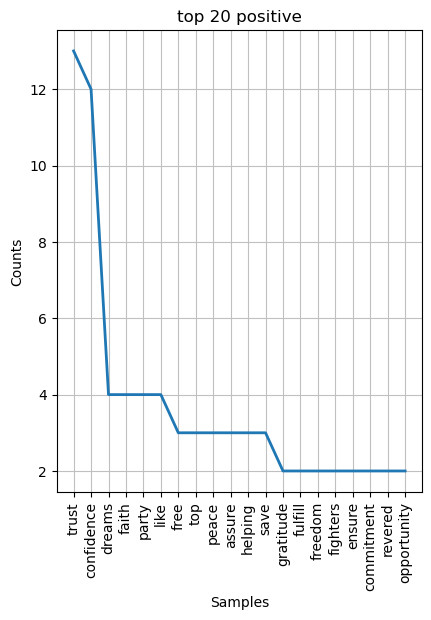

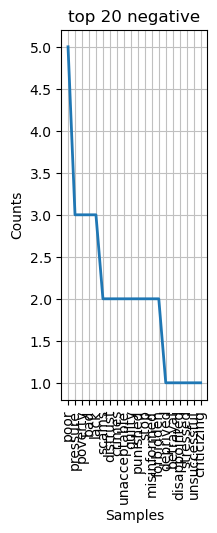

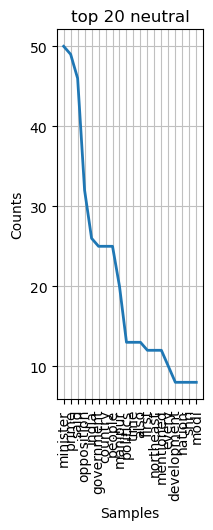

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(16,6))
plt.subplot(131)
word_freq_posi.plot(20,title='top 20 positive')

plt.subplot(131)
word_freq_nega.plot(20,title='top 20 negative')

plt.subplot(131)
word_freq_neut.plot(20,title='top 20 neutral')

plt.tight_layout()
plt.show

#### Positive word: Trust word is used more then 12 times, least positive word used is 'opportunity' only 2 times.
#### Negative word: Poor word is used 5 times and criticizing 1 times
#### Neutral word: Minister word used 50 times, modi word used 8 times

In [17]:
df_posi=pd.DataFrame(word_freq_posi.most_common(20),columns=['Word','Frequency'])
df_nega=pd.DataFrame(word_freq_nega.most_common(20),columns=['Word','Frequency'])
df_neut=pd.DataFrame(word_freq_neut.most_common(20),columns=['Word','Frequency'])

In [18]:
df_posi

Word  Frequency
0         trust         13
1    confidence         12
2        dreams          4
3         faith          4
4         party          4
5          like          4
6          free          3
7           top          3
8         peace          3
9        assure          3
10      helping          3
11         save          3
12    gratitude          2
13      fulfill          2
14      freedom          2
15     fighters          2
16       ensure          2
17   commitment          2
18      revered          2
19  opportunity          2

In [19]:
df_nega

Word  Frequency
0           poor          5
1       pressure          3
2        poverty          3
3            bad          3
4           lack          3
5          scams          2
6       distrust          2
7         crimes          2
8   unacceptable          2
9         guilty          2
10      punished          2
11          stop          2
12   misinformed          2
13     forbidden          2
14      deprived          1
15      betrayal          1
16  disappointed          1
17      stressed          1
18  unsuccessful          1
19   criticizing          1

In [20]:
df_neut

Word  Frequency
0      minister         50
1         prime         49
2          said         46
3    opposition         32
4         india         26
5    government         25
6       country         25
7        people         25
8       manipur         20
9      politics         13
10         time         13
11         also         13
12        first         12
13    northeast         12
14    mentioned         12
15        every         10
16  development          8
17       nation          8
18         shri          8
19         modi          8

In [21]:
fig_posi=px.bar(df_posi,x='Word',y='Frequency',title='Top 20 positive words')
fig_nega=px.bar(df_nega,x='Word',y='Frequency',title='Top 20 negative words')
fig_neut=px.bar(df_neut,x='Word',y='Frequency',title='Top 20 neutal words')

fig_posi.show()
fig_nega.show()
fig_neut.show()

In [22]:
word_posi=WordCloud(width=600,height=400,background_color='white').generate_from_frequencies(word_freq_posi)
word_nega=WordCloud(width=600,height=400,background_color='black').generate_from_frequencies(word_freq_nega)
word_neut=WordCloud(width=600,height=400,background_color='blue').generate_from_frequencies(word_freq_neut)

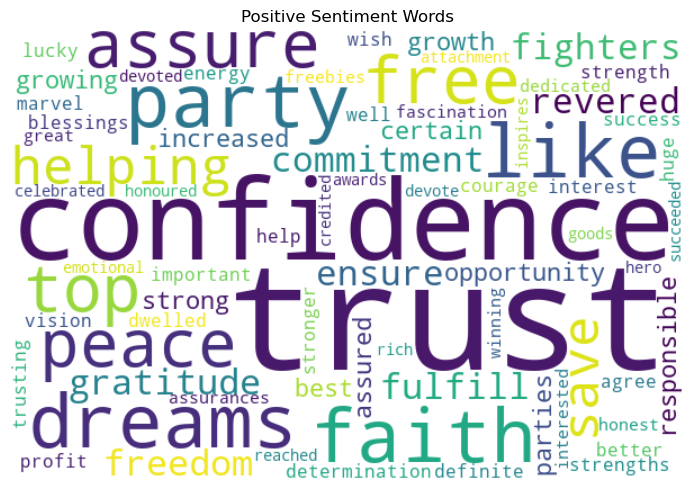

In [23]:
plt.figure(figsize=(15,5))

plt.imshow(word_posi,interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Words')


plt.tight_layout()
plt.show()

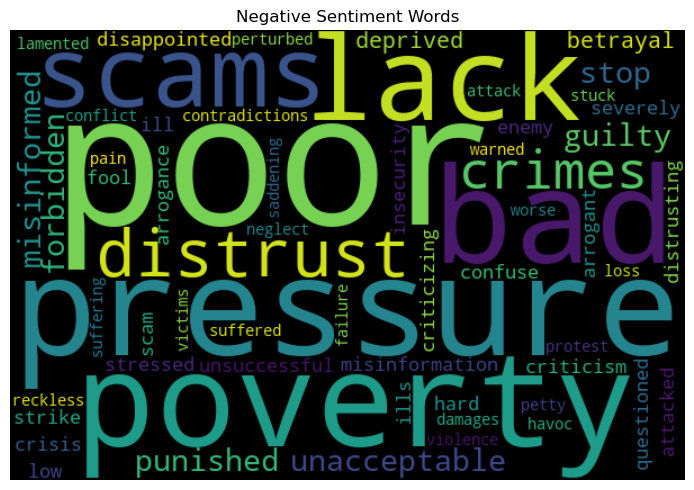

In [25]:

plt.figure(figsize=(15,5))
plt.imshow(word_nega,interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Words')

plt.tight_layout()
plt.show()

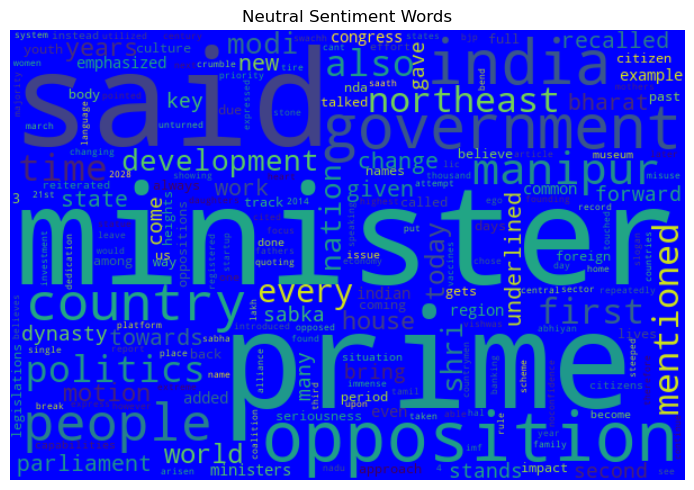

In [27]:

plt.figure(figsize=(15,5))
plt.imshow(word_neut,interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Words')

plt.tight_layout()
plt.show()